### **3. Data understanding**

**3.1. Cài đặt thư viện cần thiết**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('stock_data_output/data.csv')

**3.2. Tìm hiểu các thông tin về dữ liệu**

**Tính lợi nhuận trung bình của mỗi cổ phiếu**

In [9]:
mean_profit = df.groupby('ticker')['profit'].mean()
std_profit = df.groupby('ticker')['profit'].std()

print("Mean profit by ticker:")
print(mean_profit)
print("\nStandard deviation of profit by ticker:")
print(std_profit)

Mean profit by ticker:
ticker
AGR     22973.179017
BID    135127.675758
CTG     23956.288908
VCB    119193.282161
Name: profit, dtype: float64

Standard deviation of profit by ticker:
ticker
AGR    9.797863e+05
BID    1.981456e+06
CTG    5.493466e+06
VCB    1.936191e+06
Name: profit, dtype: float64


**Kiểm tra outliers**

In [11]:
outliers = {}
for ticker in df['ticker'].unique():
    ticker_data = df[df['ticker'] == ticker]['profit']
    Q1 = ticker_data.quantile(0.25)
    Q3 = ticker_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[ticker] = ticker_data[(ticker_data < lower_bound) | (ticker_data > upper_bound)]

for ticker, outlier_values in outliers.items():
    print(f"Outliers for {ticker}:")
    print(outlier_values)

Outliers for AGR:
27     -309339.0
51      449287.5
54     -225586.0
56     -240322.2
57      163650.6
          ...   
1737   -264875.0
1739   -207180.0
1740    238300.0
1744    190120.0
1746    220185.0
Name: profit, Length: 551, dtype: float64
Outliers for BID:
1749    2576080.0
1752    2218398.0
1759    2942289.0
1799    3902640.3
1832    2047339.8
          ...    
3398   -3944271.0
3404   -7341132.0
3427    2004750.0
3434   -2485518.0
3482    3128320.0
Name: profit, Length: 297, dtype: float64
Outliers for CTG:
3720    4084371.0
3725    4221837.5
3763    5432159.9
3765    5721114.0
3767   -8329467.6
          ...    
5167   -3971025.0
5170    5650080.0
5172   -5480433.0
5177   -9947672.0
5185   -4151825.0
Name: profit, Length: 348, dtype: float64
Outliers for VCB:
5247    2079312.5
5257    2129400.0
5349    3990159.6
5434    4014701.7
5443    3797834.8
          ...    
6963    4881360.0
6965   -3493600.0
6985   -4554540.0
6986   -2345200.0
6995   -5189440.0
Name: profit, Length:

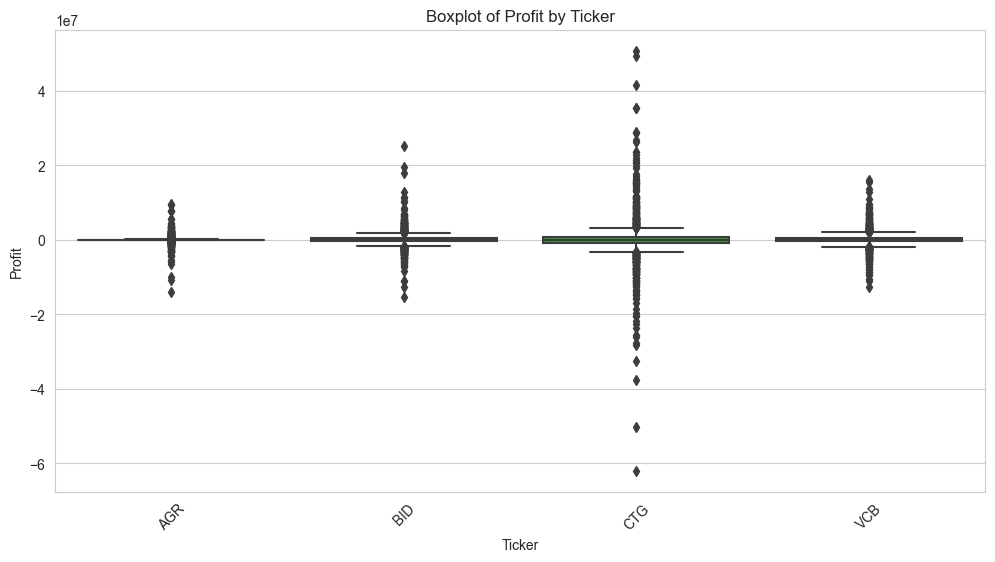

In [12]:
# Vẽ boxplot để xác định outliers cho từng mã cổ phiếu
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ticker', y='profit')
plt.title('Boxplot of Profit by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

Mặc dù dữ liệu có số lượng lớn outliers, tuy nhiên về mặt thực tế thì dữ liệu trên hoàn toàn phù hợp. Do đó chúng ta không cần thiết phải xử lí các giá trị ngoại lai này.

**Tìm hiểu quan hệ giữa các biến**

C:\Users\DLCH\AppData\Local\Temp\ipykernel_19924\887329379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


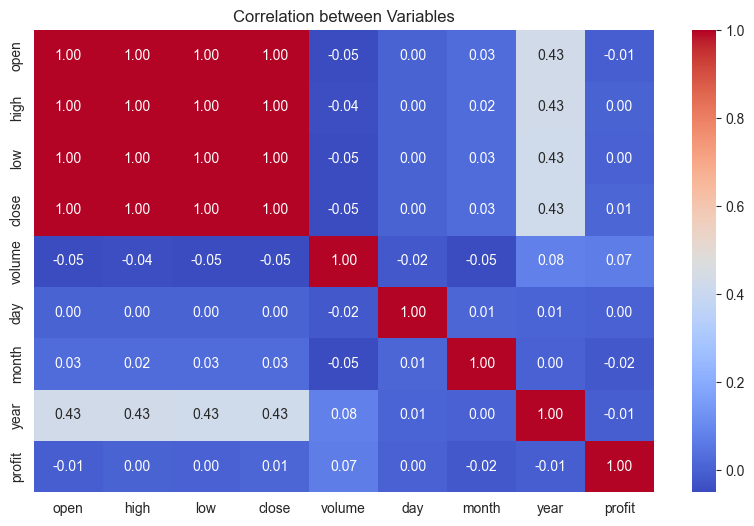

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Variables')
plt.show()

**Kiểm tra phân phối của dữ liệu**

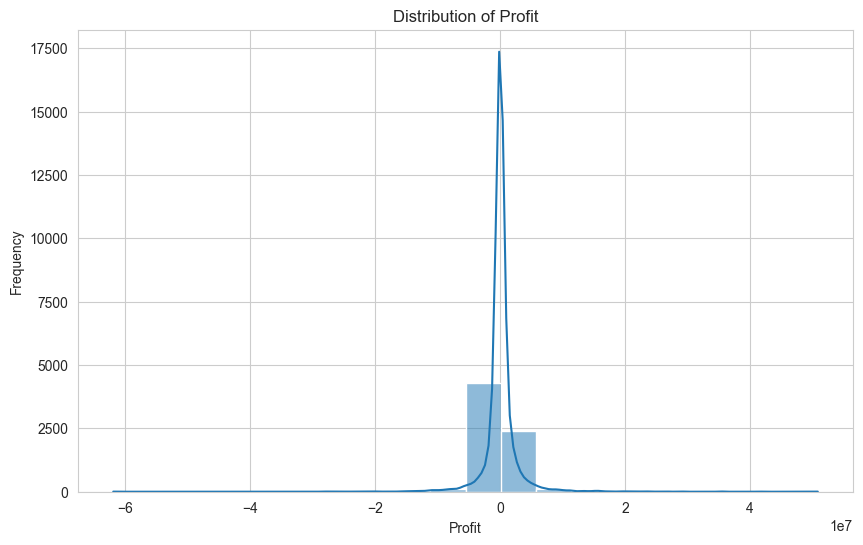

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['profit'], kde=True, bins=20)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

**Phân tích nhóm và so sánh**

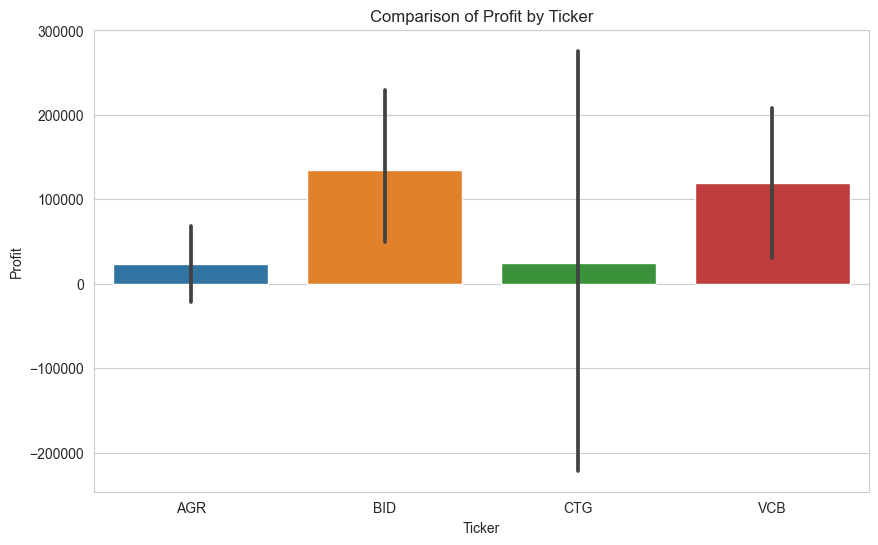

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='ticker', y='profit')
plt.title('Comparison of Profit by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Profit')
plt.show()